# Sigma平滑滤波器

In [4]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [5]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [12]:
def noise_pepper(img,a):
    m,n = img.shape[0],img.shape[1]
    R = np.random.randn(m,n)
    dst = np.zeros(img.shape,dtype=np.float64)
    rgb = np.float64(img)
    df_R = DataFrame(R)
    idx = df_R <= a
    dst[idx] = rgb[idx]
    return dst

def sigma_filter(src):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            rgb = np.array([src[i,j],src[i-1,j-1],src[i,j-1],
                    src[i+1,j-1],src[i-1,j],src[i+1,j],
                    src[i-1,j+1],src[i,j+1],src[i+1,j+1]],dtype=np.float64)
            gray = 0.299 * rgb[:,0] + 0.587 * rgb[:,1] + 0.114 * rgb[:,2]
            r = rgb[:,0]
            g = rgb[:,1]
            b = rgb[:,2]
            variance = 0  
            count = 0 
            tr,tg,tb = 0.0,0.0,0.0
            avg = np.mean(gray)
            for m in range(9):
                variance += ((gray[m] - avg) * (gray[m] - avg)) / 9
            variance = np.sqrt(variance)
            for m in range(9):
                if (gray[m] < (gray[0] - avg)) and (gray[m] > variance + gray[0]):
                    r[m] = 0
                    g[m] = 0
                    b[m] = 0
                else:
                    count += 1
            dst[i,j,0] = np.sum(r) / count
            dst[i,j,1] = np.sum(g) / count
            dst[i,j,2] = np.sum(b) / count
            
    return cv2.convertScaleAbs(dst)

In [21]:
noise_src = cv2.convertScaleAbs(noise_pepper(src,0.05))
dst = sigma_filter(noise_src)

Text(0.5,1,'DST')

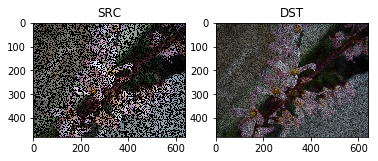

In [22]:
plt.subplot(121)
plt.imshow(noise_src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

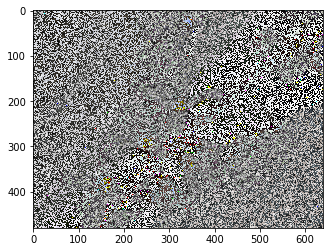

In [20]:
plt.imshow(cv2.convertScaleAbs(dst - noise_src))

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45312333